# Deep Learning A Z Boltzmann Machines - Recomendação

- Documentação: https://github.com/echen/restricted-boltzmann-machines

Época 0 - Erro: 8.8674


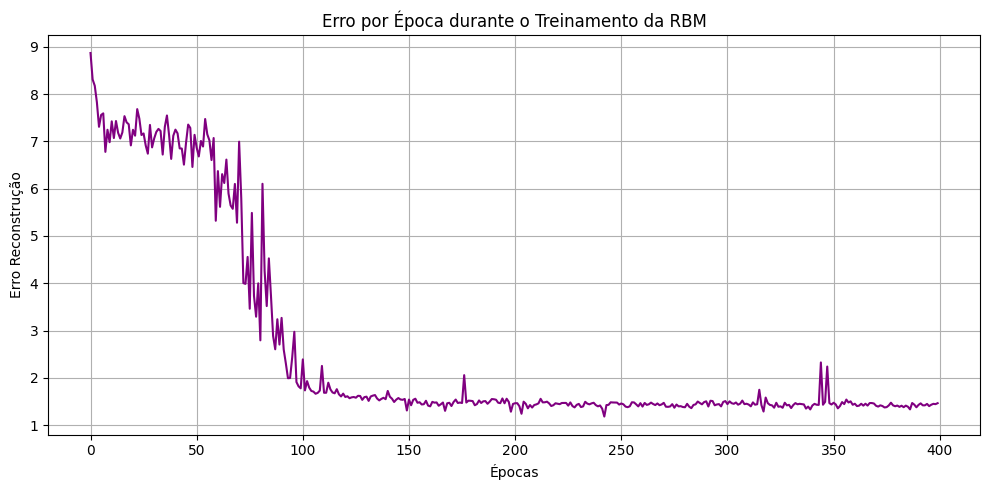

In [46]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
import rbm


# --- Classe RBM básica com registro do erro ---
class RBM:
    def __init__(self, num_visible, num_hidden, seed=None):  # <- adicione seed aqui
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        if seed is not None:
            np.random.seed(seed)
        self.weights = np.random.normal(0, 0.01, (self.num_visible, self.num_hidden))
        self.hidden_bias = np.zeros(self.num_hidden)
        self.visible_bias = np.zeros(self.num_visible)
        self.errors = []


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, data, max_epochs=1000, learning_rate=0.1):
        for epoch in range(max_epochs):
            epoch_error = 0
            for sample in data:
                v0 = sample
                h0_prob = self.sigmoid(np.dot(v0, self.weights) + self.hidden_bias)
                h0 = h0_prob > np.random.rand(self.num_hidden)

                v1_prob = self.sigmoid(np.dot(h0, self.weights.T) + self.visible_bias)
                v1 = v1_prob > np.random.rand(self.num_visible)
                h1_prob = self.sigmoid(np.dot(v1, self.weights) + self.hidden_bias)

                self.weights += learning_rate * (
                    np.outer(v0, h0_prob) - np.outer(v1, h1_prob)
                )
                self.visible_bias += learning_rate * (v0 - v1)
                self.hidden_bias += learning_rate * (h0_prob - h1_prob)

                epoch_error += np.sum((v0 - v1_prob) ** 2)

            self.errors.append(epoch_error)
            if epoch % 500 == 0:
                print(f"Época {epoch} - Erro: {epoch_error:.4f}")

    def plot_errors(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.errors, color='purple')
        plt.title("Erro por Época durante o Treinamento da RBM")
        plt.xlabel("Épocas")
        plt.ylabel("Erro Reconstrução")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# --- Dados de entrada (base binária) ---
base = np.array([[1, 1, 1, 0, 0, 0],
                 [1, 0, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 1, 1, 1, 1],
                 [0, 0, 1, 1, 0, 1],
                 [0, 0, 1, 1, 0, 1]])
filmes = ["A bruxa", "Invocação do mal", "O chamado", "Se beber não case", "Gente grande", "American pie"]
# --- Treinamento da RBM com gráfico ---
rbm = RBM(num_visible=6, num_hidden=2, seed=42)
rbm.train(base, max_epochs=400)
rbm.plot_errors()


In [50]:
def recomendar_filmes_varios_usuarios(rbm, usuarios, filmes, threshold=0.5):
    for idx, entrada_usuario in enumerate(usuarios):
        entrada_usuario = np.array(entrada_usuario)

        # Ativações dos neurônios ocultos
        h_prob = rbm.sigmoid(np.dot(entrada_usuario, rbm.weights) + rbm.hidden_bias)
        h_estado = h_prob > np.random.rand(rbm.num_hidden)

        # Reconstrução da camada visível (recomendação)
        v_reconstruida = rbm.sigmoid(np.dot(h_estado, rbm.weights.T) + rbm.visible_bias)

        # Recomendar apenas os filmes que o usuário ainda não viu (entrada = 0)
        print(f"\n🎬 Recomendações para Usuário {idx + 1}:")
        recomendados = 0
        for i in range(len(filmes)):
            if entrada_usuario[i] == 0 and v_reconstruida[i] > threshold:
                print(f"- {filmes[i]} (probabilidade prevista: {v_reconstruida[i]:.2f})")
                recomendados += 1
        if recomendados == 0:
            print("Nenhum filme recomendado com confiança suficiente.")


# Lista com vários usuários (binário: 1 = viu, 0 = não viu)
usuarios_novos = [
    [1, 0, 0, 0, 1, 0],  # Usuário 1
    [0, 0, 1, 1, 0, 0],  # Usuário 2
    [0, 0, 0, 0, 0, 0],  # Usuário 3 (não viu nada ainda)
]

# Chamar a função
recomendar_filmes_varios_usuarios(rbm, usuarios_novos, filmes)


🎬 Recomendações para Usuário 1:
- Invocação do mal (probabilidade prevista: 0.73)
- O chamado (probabilidade prevista: 1.00)

🎬 Recomendações para Usuário 2:
- American pie (probabilidade prevista: 0.99)

🎬 Recomendações para Usuário 3:
- O chamado (probabilidade prevista: 0.99)
- Se beber não case (probabilidade prevista: 0.97)
- American pie (probabilidade prevista: 0.99)


In [51]:
rbm.weights, rbm.weights.shape

(array([[ 4.02795976,  4.68486715],
        [ 2.42925481,  2.85417355],
        [ 1.23327675,  1.31726782],
        [-3.92414012, -4.5024603 ],
        [-2.39881093, -2.5961586 ],
        [-4.1207213 , -4.73896284]]),
 (6, 2))

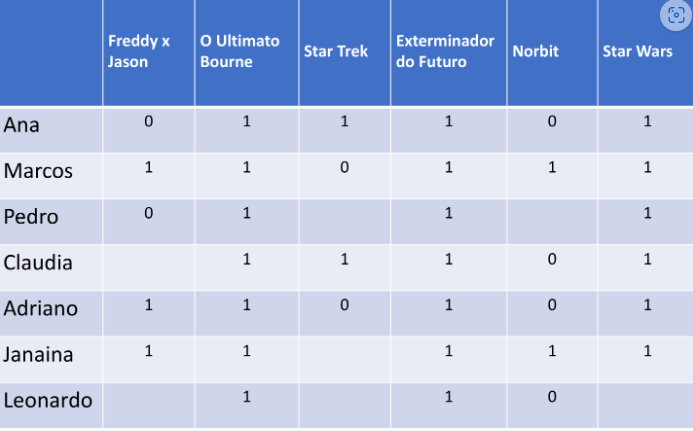